In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras import backend as K
from imutils import build_montages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [0]:

train=pd.read_csv('https://pjreddie.com/media/files/mnist_train.csv')
test=pd.read_csv('https://pjreddie.com/media/files/mnist_test.csv')

In [0]:
# load dataset
(X_train, y_train), (X_test,y_test) = fashion_mnist.load_data()

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [0]:
X_train=X_train/255.0
X_test=X_test/255.0

In [0]:
image_shape = (28,28,1)
X_train = X_train.reshape(X_train.shape[0],*image_shape)
X_test = X_test.reshape(X_test.shape[0],*image_shape)

In [0]:
classifier = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])
classifier.compile(loss ='sparse_categorical_crossentropy', optimizer='adam',metrics =['accuracy'])

In [75]:
mnist= classifier.fit(X_train,y_train,batch_size=512,
                         nb_epoch = 50,
                         validation_data = (X_test,y_test),verbose=1)
                         

118/118 [==============================] - 22s 190ms/step - loss: 0.7028 - accuracy: 0.7685 - val_loss: 0.4544 - val_accuracy: 0.8382


In [76]:
classifier.evaluate(X_test,y_test,verbose=0)


[0.4557487666606903, 0.8381999731063843]

In [77]:

predicted_classes = classifier.predict_classes(X_test)
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1000
           1       0.98      0.95      0.97      1000
           2       0.72      0.78      0.75      1000
           3       0.84      0.87      0.85      1000
           4       0.79      0.66      0.72      1000
           5       0.93      0.93      0.93      1000
           6       0.57      0.60      0.58      1000
           7       0.92      0.89      0.90      1000
           8       0.94      0.95      0.94      1000
           9       0.92      0.95      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



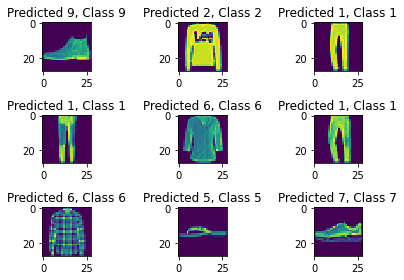

In [81]:
correct = np.nonzero(predicted_classes==y_test)[0]

incorrect = np.nonzero(predicted_classes!=y_test)[0]

for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28),  interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()